In [167]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pyplt
import seaborn as sbn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


In [173]:
std_dta=pd.read_csv('student_data.csv')

In [126]:
std_dta.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [127]:
len(std_dta)

1044

In [128]:
len(std_dta.columns) 

33

In [129]:
std_dta.shape

(1044, 33)

In [130]:
std_dta.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [131]:
std_dta.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [132]:
display(std_dta.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [133]:
std_dta.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

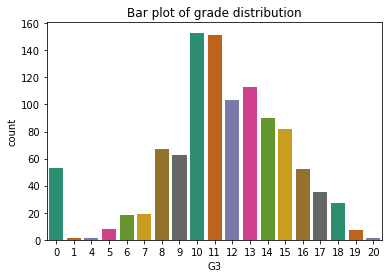

In [134]:
sbn.countplot(x ='G3', data = std_dta, palette = "Dark2")
pyplt.title('Bar plot of grade distribution')
pyplt.show()

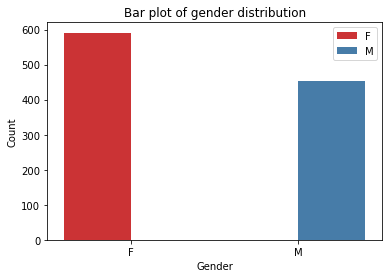

In [135]:
sbn.barplot(x=std_dta['sex'].value_counts().index,y=std_dta['sex'].value_counts().values,
                   hue=['F','M'],palette="Set1")

pyplt.xlabel('Gender')
pyplt.ylabel('Count')
pyplt.title('Bar plot of gender distribution')
pyplt.show()


Text(0.5, 1.0, 'Distribution of scores by gender')

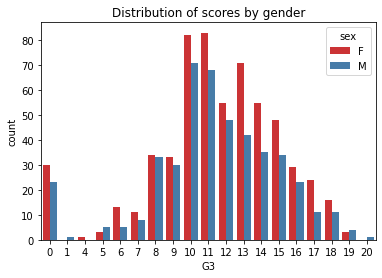

In [136]:
sbn.countplot(data=std_dta, x="G3", hue="sex",palette = "Set1")
pyplt.title('Distribution of scores by gender')

<AxesSubplot:>

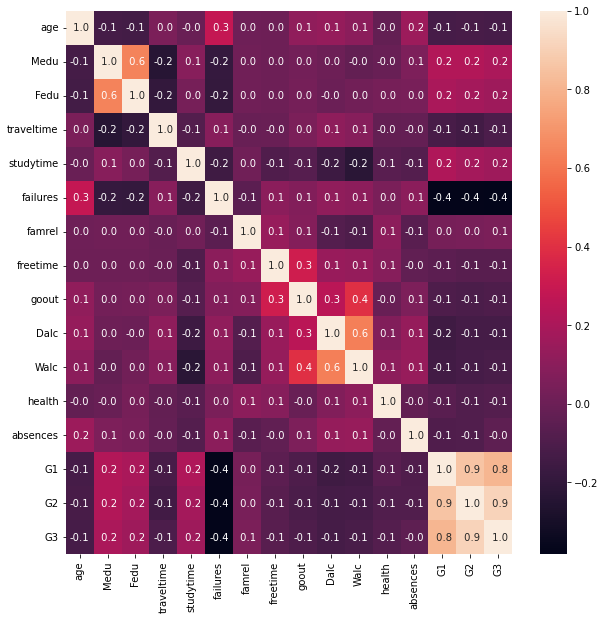

In [137]:
pyplt.figure(figsize=(10,10))
sbn.heatmap(std_dta.corr(),annot=True,fmt=' .1f')

Text(0.5, 1.0, 'Mother education vs final grade')

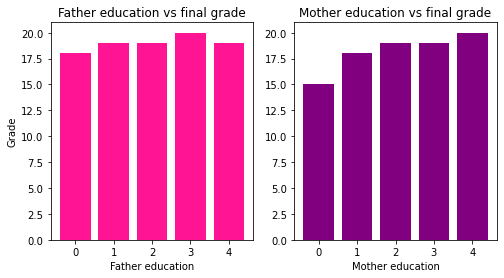

In [138]:
fig,(a,b)=pyplt.subplots(nrows=1,ncols=2,figsize=(8,4))
a.bar(std_dta['Fedu'],std_dta['G3'],color='deeppink')
a.set_xlabel('Father education')
a.set_ylabel('Grade')
b.bar(std_dta['Medu'],std_dta['G3'],color='purple')
b.set_xlabel('Mother education')
a.set_title('Father education vs final grade')
b.set_title('Mother education vs final grade')

Text(0.5, 1.0, 'Mother job vs final grade')

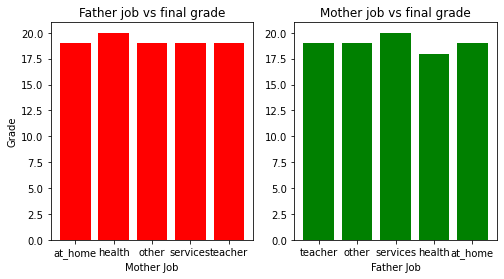

In [139]:
fig,(a1,b1)=pyplt.subplots(nrows=1,ncols=2,figsize=(8,4))
a1.bar(std_dta['Mjob'],std_dta['G3'],color='red')
a1.set_xlabel('Mother Job')
a1.set_ylabel('Grade')
b1.bar(std_dta['Fjob'],std_dta['G3'],color='green')
b1.set_xlabel('Father Job')
a1.set_title('Father job vs final grade')
b1.set_title('Mother job vs final grade')



Text(0, 0.5, 'G3')

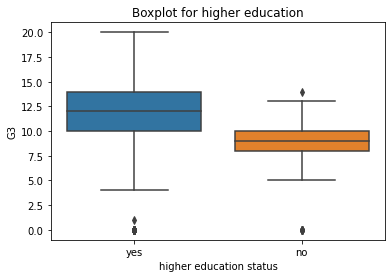

In [140]:
sbn.boxplot(x="higher", y="G3", data=std_dta)
pyplt.title("Boxplot for higher education")
pyplt.xlabel("higher education status")
pyplt.ylabel("G3")

C:\Users\soniy\OneDrive\Documents\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total Students')

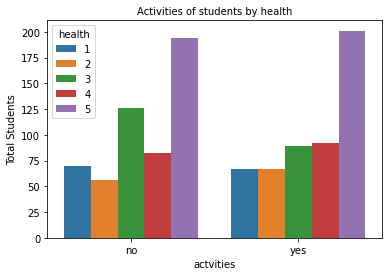

In [141]:
actvty= sbn.countplot(std_dta['activities'],hue=std_dta['health'])
actvty.axes.set_title("Activities of students by health",fontsize=10)
actvty.axes.set_xlabel("actvities",fontsize=10)
actvty.axes.set_ylabel("Total Students",fontsize=10)

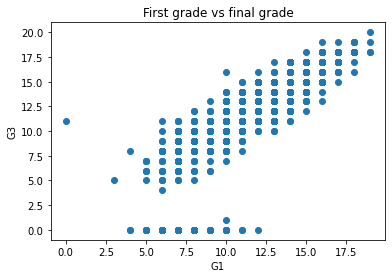

In [142]:
pyplt.scatter(data=std_dta, x="G1", y="G3")
pyplt.xlabel('G1')
pyplt.ylabel('G3')
pyplt.title('First grade vs final grade')
pyplt.show()


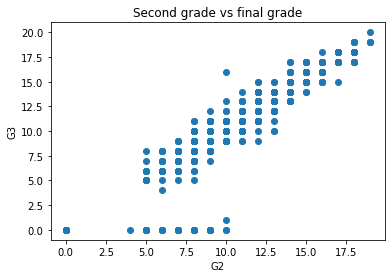

In [143]:
pyplt.scatter(data=std_dta, x="G2", y="G3")
pyplt.xlabel('G2')
pyplt.ylabel('G3')
pyplt.title('Second grade vs final grade')
pyplt.show()


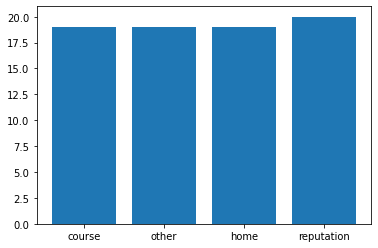

In [144]:
pyplt.bar(std_dta['reason'], std_dta['G3'])
pyplt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblcdr = LabelEncoder()

In [179]:
lblcdr = LabelEncoder()

std_dta['internet'] = lblcdr.fit_transform(std_dta['internet'])
std_dta['sex'] = lblcdr.fit_transform(std_dta['sex'])
std_dta['address'] = lblcdr.fit_transform(std_dta['address'])
std_dta['famsize'] = lblcdr.fit_transform(std_dta['famsize'])
std_dta['Pstatus'] = lblcdr.fit_transform(std_dta['Pstatus'])
std_dta['Medu'] = lblcdr.fit_transform(std_dta['Medu'])

std_dta['guardian'] = lblcdr.fit_transform(std_dta['guardian'])
std_dta['schoolsup'] = lblcdr.fit_transform(std_dta['schoolsup'])
std_dta['famsup'] = lblcdr.fit_transform(std_dta['famsup'])
std_dta['paid'] = lblcdr.fit_transform(std_dta['paid'])
std_dta['activities'] = lblcdr.fit_transform(std_dta['activities'])
std_dta['nursery'] = lblcdr.fit_transform(std_dta['nursery'])
std_dta['higher'] = lblcdr.fit_transform(std_dta['higher'])
std_dta['romantic'] = lblcdr.fit_transform(std_dta['romantic'])
std_dta['Mjob'] = lblcdr.fit_transform(std_dta['Mjob'])
std_dta['Fjob'] = lblcdr.fit_transform(std_dta['Fjob'])
std_dta['Fedu'] = lblcdr.fit_transform(std_dta['Fedu'])
std_dta['reason'] = lblcdr.fit_transform(std_dta['reason'])
std_dta['school'] = lblcdr.fit_transform(std_dta['school'])

In [175]:
std_dta

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
1040,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
1041,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
1042,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
from matplotlib import pyplot as pyplt
pyplt.figure(figsize=(10,8))
pyplt.scatter(std_dta_pca[:,0],x_pca[:,1],c=std_dta['G3'])
pyplt.xlabel('principle component 1')
pyplt.ylabel('principle component 2')


In [147]:
X_std_dta=std_dta.drop(['school','Mjob','Fjob','G3','Fedu','reason'],axis=1)

In [148]:
y_std_dta=std_dta[['G3']]

In [149]:
from sklearn.model_selection import train_test_split
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std_dta,y_std_dta, 
                                                                    test_size = 0.20, random_state=1)


In [150]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_std_train = scaler.fit_transform(X_std_train)
X_std_test = scaler.transform(X_std_test)

In [151]:
from sklearn.ensemble import RandomForestRegressor
mdl_reg=RandomForestRegressor(n_estimators=80)
mdl_reg.fit(X_std_train,y_std_train)

C:\Users\soniy\AppData\Local\Temp/ipykernel_28128/2162102499.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_std_train,y_std_train)


RandomForestRegressor(n_estimators=80)

In [152]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = mdl_reg.predict(X_std_test)
mean_squared_error(y_std_test, y_pred)

3.3065946471291867

In [153]:
r2_mdl_reg= round(r2_score(y_std_test , y_pred),3)
r2_mdl_reg

0.817

In [181]:
std_dta['Grade_category'] = 'na'
std_dta.loc[(std_dta.G3 >= 15) & (std_dta.G3 <= 20), 'Grade_category'] = 'well' 
std_dta.loc[(std_dta.G3 >= 9) & (std_dta.G3<= 14), 'Grade_category'] = 'average' 
std_dta.loc[(std_dta.G3 >= 0) & (std_dta.G3 <= 8), 'Grade_category'] = 'poor' 
std_dta.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade_category
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,average
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,average
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,average
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,average
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,average
5,0,1,16,1,1,1,4,3,3,2,...,4,2,1,2,5,6,12,12,13,average
6,0,1,16,1,1,1,2,2,2,2,...,4,4,1,1,3,0,13,12,13,average
7,0,0,17,1,0,0,4,4,2,4,...,1,4,1,1,1,2,10,13,13,average
8,0,1,15,1,1,0,3,2,3,2,...,2,2,1,1,1,0,15,16,17,well
9,0,1,15,1,0,1,3,4,2,2,...,5,1,1,1,5,0,12,12,13,average


In [182]:
X_new_std_dta=std_dta.drop(['school','Mjob','Fjob','G3','Fedu','Grade_category'],axis=1)


In [156]:
y_new_std_dta=std_dta[['Grade_category']]


In [157]:
X_new_std_train, X_new_std_test, y_new_std_train, y_new_std_test = train_test_split(X_new_std_dta,y_new_std_dta, test_size = 0.20, random_state=1)


In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_new_std_train = scaler.fit_transform(X_new_std_train)
X_new_std_test = scaler.transform(X_new_std_test)

In [159]:
from sklearn.ensemble import RandomForestClassifier
mdl_cls=RandomForestClassifier(criterion='entropy',n_estimators=80)
mdl_cls.fit(X_new_std_train,y_new_std_train)

C:\Users\soniy\AppData\Local\Temp/ipykernel_28128/1816541300.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_new.fit(X_new_std_train,y_new_std_train)


RandomForestClassifier(criterion='entropy', n_estimators=80)

In [160]:
y_new_pred=mdl_cls.predict(X_new_std_test)

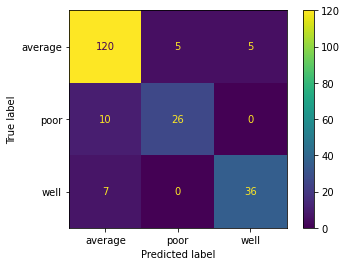

In [161]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mdl_cls, X_new_std_test, y_new_std_test)

In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_new_std_test, y_new_pred))

              precision    recall  f1-score   support

     average       0.88      0.92      0.90       130
        poor       0.84      0.72      0.78        36
        well       0.88      0.84      0.86        43

    accuracy                           0.87       209
   macro avg       0.86      0.83      0.84       209
weighted avg       0.87      0.87      0.87       209



In [163]:
acc_std= accuracy_score(y_new_std_test, y_new_pred)
acc_std

0.8708133971291866